In [ ]:
import os
import numpy as np
from high_level_nav_warehouse.visualisation_tools import get_efe_frame, plot_likelihood, plot_transitions, plot_state_in_map_wt_gt,\
    pickle_dump_model, pickle_load_model, remove_white_border
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from shapely.geometry import Point

## methods

Plot covered area

In [2]:
def plot_coverage_over_steps(area_over_poses, max_coverage=None, save_path=None):
    """
    Plot the coverage as a percentage of the maximum coverage over steps.

    :param area_over_poses: List of areas covered at each step.
    :param max_coverage: Maximum possible area to normalize coverage (if known).
                         If None, plots raw area.
    """
    # Ensure input is a numpy array
    area_data = np.array(area_over_poses)
    if area_data.size == 0:
        print("No area data to plot.")
        return
        
    steps = np.arange(len(area_data))
    ylabel = "Area Covered (Node Buffers)" # Updated label

    if max_coverage is not None and max_coverage > 0:
        # Normalize to percentage
        area_data = area_data / max_coverage
        ylabel = "Area Covered (%)"
        y_limit = 1.05
        y_ticks = np.arange(0, 1.1, 0.2)
        tick_labels = [f"{tick*100:.0f}%" for tick in y_ticks] # Format as percentage
    else:
        # Plot raw area
        # Handle case where area_data might be all zeros
        max_val = np.max(area_data)
        y_limit = max_val * 1.1 if max_val > 0 else 1.0
        # Let matplotlib choose automatic ticks for raw area unless specified
        y_ticks, _ = plt.yticks()
        tick_labels = [f"{tick:.2f}" for tick in y_ticks] # Format raw area ticks


    # Create the plot
    plt.figure(figsize=(10, 6))
    # Use step plotting to emphasize discrete changes when a new node is visited
    # plt.step(steps, area_data, where='post', color='blue', linewidth=3, label='Coverage')
    plt.plot(area_data, color='blue', linewidth=3, label='Coverage (%)')

    # Adjust plot limits and ticks
    plt.ylim(0, y_limit)
    plt.xlim(0, len(steps) - 1 if len(steps) > 1 else 1)
    # Adjust x-ticks frequency based on number of steps
    step_interval = max(1, len(steps) // 10) # Show about 10 ticks max
    plt.xticks(np.arange(0, len(steps), step_interval), color='black', fontsize=16)
    plt.yticks(y_ticks, labels=tick_labels, color='black', fontsize=16)

    plt.gca().set_facecolor('0.9')
    plt.grid(color='white', linestyle='-', linewidth=1)

    # Labels and title
    plt.xlabel("Poses Visited (Step Index)", fontsize=20, color='black') # Clarified label
    plt.ylabel(ylabel, fontsize=20, color='black')
    plt.title("Node Proximity Coverage over Steps", fontsize=25, color='black') # Updated title
    # plt.legend()

    # Customize the outer background
    plt.gcf().patch.set_facecolor('white')

    # Show the plot
    plt.tight_layout()
    if save_path:
        filepath = f"{save_path}/node_coverage_over_steps.png"
        plt.savefig(filepath, transparent=False, dpi=300, bbox_inches='tight')
        print(f"Coverage plot saved to {filepath}")
    plt.show()

    '''
    def plot_coverage_over_steps(area_over_poses, max_coverage=None, save_path=None):
    """
    Plot the coverage as a percentage of the maximum coverage over steps.

    :param area_over_poses: List of areas covered at each step.
    :param max_coverage: Maximum area to normalize coverage.
    """
    if max_coverage is not None:
        # area covered in percentage
        normalised_area = np.array(area_over_poses) / max_coverage
    else:
        normalised_area = np.array(area_over_poses) 

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(normalised_area, color='blue', linewidth=3, label='Coverage (%)')

    plt.ylim(0, 1.05)  
    plt.xlim(0, len(area_over_poses)) 
    plt.xticks(np.arange(0, len(area_over_poses) + 1, 5), color='black',fontsize=16)  # Steps every 10
    plt.yticks(np.arange(0, 1.1, 0.2), color='black',fontsize=16)  # Percentages every 20%
    plt.gca().set_facecolor('0.9')  
    plt.grid(color='white', linestyle='-', linewidth=1) 

    # Labels and title
    plt.xlabel("Steps Taken", fontsize=20, color='black')
    plt.ylabel("Area Covered (%)", fontsize=20, color='black')
    plt.title("Coverage over Steps", fontsize=25, color='black')
    # plt.legend()

    # Customize the outer background
    plt.gcf().patch.set_facecolor('white') 

    # Show the plot
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path+'/coverage_over_steps.png', transparent=False, dpi=300, bbox_inches='tight')
    plt.show()
    '''

In [ ]:
def plot_coverage_over_distance(area_over_poses, max_coverage=None, save_path=None ,  name='' , step_m=2):
    """
    Plot the coverage as a percentage of the maximum coverage over steps.

    :param area_over_poses: List of areas covered at each step.
    :param max_coverage: Maximum area to normalize coverage.
    """
    if max_coverage is not None:
        # area covered in percentage
        normalised_area = np.array(area_over_poses) / max_coverage
    else:
        normalised_area = np.array(area_over_poses) 

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(normalised_area, color='blue', linewidth=3, label='Coverage (%)')

    plt.ylim(0, 1.05)  
    plt.xlim(0, len(area_over_poses)) 
    #plt.xticks(np.arange(0, len(area_over_poses) + 1, 10), labels=np.arange(0, int(len(area_over_poses)) + 1, 10)*step_m, color='black',fontsize=16)  # Steps every 10
    plt.yticks(np.arange(0, 1.1, 0.2), color='black',fontsize=16)  # Percentages every 20%
    plt.gca().set_facecolor('0.9')  
    plt.grid(color='white', linestyle='-', linewidth=1) 

    # Labels and title
    plt.xlabel("Distance Travelled (m)", fontsize=20, color='black')
    plt.ylabel("Area Covered (%)", fontsize=20, color='black')
    plt.title("Coverage over Distance", fontsize=25, color='black')
    # plt.legend()

    # Customize the outer background
    plt.gcf().patch.set_facecolor('white') 

    # Show the plot
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path+'/'+name+'coverage_over_distance.png', transparent=False, dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
def plot_multiple_coverage_over_distance(multiple_area_over_poses, labels = None, max_coverage=None, step_m=2, save_path=None):
    """
    Plot the coverage as a percentage of the maximum coverage over steps.

    :param area_over_poses: List of areas covered at each step.
    :param max_coverage: Maximum area to normalize coverage.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Ensure labels is not None and matches the number of curves
    if labels is None:
        labels = [f"Curve {i+1}" for i in range(len(multiple_area_over_poses))]
    
    for i, (area_over_poses, label) in enumerate(zip(multiple_area_over_poses, labels)):
        if max_coverage is not None:
            # Normalize area covered as a percentage
            normalised_area = np.array(area_over_poses) / max_coverage
        else:
            normalised_area = np.array(area_over_poses)
        
        # Adjust x-axis based on the dataset index
        if i == 0:  # First list has twice the time steps
            x_values = np.linspace(0, len(area_over_poses) , len(area_over_poses)) 
        else:  # Other lists have standard time steps
            x_values = np.linspace(0, len(area_over_poses) , len(area_over_poses))

        # Plot each curve with a unique label
        plt.plot(x_values, normalised_area, linewidth=3, label=label)
    
    max_steps = max(len(poses) for poses in multiple_area_over_poses)
    # Set plot limits
    plt.ylim(0, 1.05)
    plt.xlim(0, max_steps)
    
    # Set x-ticks and y-ticks
    plt.xticks(np.arange(0, max_steps  + 1, 10), color='black', fontsize=16)  # Steps every 10m
    plt.yticks(np.arange(0, 1.1, 0.2), color='black', fontsize=16)  # Percentages every 20%
    
    
    # Customize grid and background
    plt.gca().set_facecolor('0.9')
    plt.grid(color='white', linestyle='-', linewidth=1)
    
    # Labels and title
    plt.xlabel("Distance Travelled (m)", fontsize=20, color='black')
    plt.ylabel("Area Covered (%)", fontsize=20, color='black')
    #plt.title("Coverage over Distance", fontsize=25, color='black')
    
    # Add legend
    plt.legend(fontsize=16, loc='lower right')
    
    # Customize the outer background
    plt.gcf().patch.set_facecolor('white')
    
    # Save the plot if a path is provided
    if save_path:
        plt.savefig(save_path + '/benchmarking_coverage_over_distance.png', transparent=False, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [4]:
def plt_poses(model):
    plt.plot()
    for pose in model :
        plt.scatter(pose[0], pose[1])
#m = model.PoseMemory.get_poses_from_memory()

Plot odometry

In [5]:
def plot_odometry_path(odom_data, noise_level:float=0.065, save_path=None):
    """ 
    Plot odometry path with color trail
    The noise level of the path can be adjusted to distinguish 
    the back and forths of the agent
    """
    # Plot with color trail
    plt.figure(figsize=(10, 6))
    # Extract odometry data
    try:
        x_data = np.array([eval(coord)[0] for coord in odom_data])
        y_data = np.array([eval(coord)[1] for coord in odom_data])
    except (SyntaxError, ValueError):
        x_data = np.array([coord[0] for coord in odom_data])
        y_data = np.array([coord[1] for coord in odom_data])
    
    if len(x_data) != len(y_data):
        raise ValueError("'x' and 'y' values must have the same length")
    
    # Add random noise to x and y coordinates
    x_data += np.random.uniform(-noise_level, noise_level, size=x_data.shape)
    y_data += np.random.uniform(-noise_level, noise_level, size=y_data.shape)
    
    # Generate indices for plotting
    indices = np.arange(len(odom_data))
    
    # Create a color map
    norm = plt.Normalize(indices.min(), indices.max())
    colors = cm.viridis(norm(indices))
    
    for i in range(len(indices) - 1):
        plt.plot(x_data[i:i+2], y_data[i:i+2], color=colors[i], lw=3)
    
    plt.title('Agent believed Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')

    # Set the color bar ticks to round numbers
    tick_values = np.linspace(indices.min(), indices.max(), num=6)
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels([f"{int(round(tick))}" for tick in tick_values])
    plt.gcf().patch.set_facecolor('white')
  
    if save_path:
        plt.savefig(save_path+'/path_over_time.png', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

In [6]:
def plot_paths_over_time(path1, path2,noise_level=0.065,save_path=None):
    """ Plot real and believed odometry over time"""
    plt.figure(figsize=(10, 6))

    #Odometry
    odom_x_data = np.array([eval(coord)[0] for coord in path1])
    odom_y_data = np.array([eval(coord)[1] for coord in path1])
    if len(odom_x_data) != len(odom_y_data):
        raise ValueError("'x' and 'y' values must have the same length")
    # Add random noise to x and y coordinates
    odom_x_data += np.random.uniform(-noise_level, noise_level, size=odom_x_data.shape)
    odom_y_data += np.random.uniform(-noise_level, noise_level, size=odom_y_data.shape)
    
    # GT odometry
    offset = eval(path2[0])
    gt_odom_x_data = np.array([eval(coord)[0]-offset[0] for coord in path2])
    gt_odom_y_data = np.array([eval(coord)[1]-offset[1] for coord in path2])
    # print(gt_odom_x_data)
    # Plot the two paths
    plt.plot(odom_x_data, odom_y_data, label="believed odom", color="blue", linestyle="-", linewidth=2)
    plt.plot(gt_odom_x_data,gt_odom_y_data, label="ground truth odom", color="red", linestyle="--", linewidth=2)
    
    # Add grid
    plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

    # Labels and title
    plt.xlabel("y", fontsize=12)
    plt.ylabel("x", fontsize=12)
    plt.title("Odometry shifting", fontsize=14)

    # Add a legend
    plt.legend(fontsize=12, loc="upper right")

    # Highlight intersections (optional, for further clarity)
    # intersections = np.isclose(path1, path2, atol=0.1)
    # plt.scatter(time[intersections], path1[intersections], color="black", label="Intersection Points", zorder=5)

    # Show plot
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path+'/odometry_shift.png', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

Get Covered area 

In [7]:
# Make sure shapely is installed: pip install shapely
from shapely.geometry import Point
from shapely.ops import unary_union
import logging # Optional: for messages if needed

# Configure logging (optional)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Function to Calculate Node Buffer Coverage ---

def calculate_node_buffer_coverage(poses, coverage_radius):
    """
    Calculates the cumulative covered area based on buffering visited node positions.

    Relies only on the list of visited node coordinates, not the path between them.

    Args:
        poses (list): A list of (x, y) tuples or similar, representing the
                      sequence of visited node positions.
        coverage_radius (float): The radius R for the circular buffer around
                                 each unique visited node position.

    Returns:
        list: A list where each element is the total covered area (area of the
              union of node buffers) after visiting the pose at that index.
    """
    if not poses:
        return []
    if coverage_radius <= 0:
        logging.warning("Coverage radius must be positive. Returning zero area.")
        return [0.0] * len(poses)

    area_over_poses = []
    current_buffer_union = None # Store the union geometry incrementally
    
    for i in range(len(poses)):
        current_pose_tuple = tuple(poses[i]) # Use tuple for hashability in set

        # Create buffer for the new unique point
        new_point = Point(current_pose_tuple)
        new_node_buffer = new_point.buffer(coverage_radius, quad_segs=12)

        # Update the total union
        if current_buffer_union is None:
            current_buffer_union = new_node_buffer
        else:
            # Calculate union incrementally
            current_buffer_union = current_buffer_union.union(new_node_buffer)

        # Append the area of the updated union
        current_total_covered_area = current_buffer_union.area
        area_over_poses.append(current_total_covered_area)
        logging.info(f"Step {i}: New pose {current_pose_tuple}. New area: {current_total_covered_area:.2f}")

    return area_over_poses

In [63]:
def get_min_x_y(points):
    """
    Get the minimum x and y values from a list of tuples.

    :param points: List of tuples [(x1, y1), (x2, y2), ...]
    :return: (min_x, min_y)
    """
    min_x = min(point[0] for point in points)
    min_y = min(point[1] for point in points)
    return int(min_x), int(min_y)

def get_max_x_y(points):
    """
    Get the maximum x and y values from a list of tuples.

    :param points: List of tuples [(x1, y1), (x2, y2), ...]
    :return: (min_x, min_y)
    """
    max_x = max(point[0] for point in points)
    max_y = max(point[1] for point in points)
    return int(max_x), int(max_y)


def count_adjacent_points(point,points, step):
    # Count adjacent points (considering diagonal as well)
    adjacent_count = -1
    cardinal_count = -1
    for next_x in (0,+step):
        for next_y in (0,+step):
            if (point[0]+next_x, point[1]+next_y) in points:
                adjacent_count +=1
                if next_x ==0 or next_y == 0:
                    cardinal_count +=1

    return cardinal_count, adjacent_count

def get_next_node_pose(self, current_pose:tuple, action:int)->list:
        """Calculates the next pose ID resulting from taking an action."""   
        next_pose = self.PoseMemory.pose_transition_from_action(action, odom=current_pose)
        next_pose_id = self.PoseMemory.pose_to_id(next_pose, save_in_memory=False)
        next_pose = self.PoseMemory.id_to_pose(next_pose_id)
        pose_in_action_range = self.PoseMemory.pose_in_action_range(action, next_pose, odom= current_pose) #if we don't reach that pose with that action, we pass
        
        if not pose_in_action_range:
            #logging.warning(f"Action {action} from pose {current_pose_id} leads to unreachable pose {next_pose_id}. Invalid transition.")
            return None # Indicate invalid transition
        #logging.info(f"Action {action} from pose {odom}, {current_pose_id} leads to pose {next_pose}, {next_pose_id}. Invalid transition.")
        return next_pose

def calculate_covered_area_new(model, points, coverage_radius:float=1):
    '''
    Calculate the over-all covered area of the topological graph.
    points: all the poses expected at this step
    step: the model distance used in this experiment
    
    '''
    covered_area = 0
    current_buffer_union = None
    for pose in points:
        adjacent_points = 0
        area = 0
        for action in model.get_possible_actions():
            next_pose = get_next_node_pose(model, pose , action)
            if next_pose is None or next_pose not in points or next_pose==pose: #no known or valid next node
                continue
            adjacent_points+=1
            # print('pose', pose , ' is adjacent to ', next_pose)
        # print('pose', pose , ' has ', adjacent_points, 'adjacent_points')
        if adjacent_points > 4:
            new_point = Point(pose)
            new_node_buffer = new_point.buffer(coverage_radius, quad_segs=12)
            # Update the total union
            if current_buffer_union is None:
                current_buffer_union = new_node_buffer
            else:
                # Calculate union incrementally
                current_buffer_union = current_buffer_union.union(new_node_buffer)            
        else:
            area+= coverage_radius*1 #We have to consider that we don't cover area < 2m on the sides
            #The number is arbitrary. 
    
        covered_area+=area
            # print(point,cardinal_count, adjacent_count, 'area',area )
    if current_buffer_union is not None:
        covered_area += current_buffer_union.area
    return covered_area


#### path_to_goal

In [9]:
def plot_path_goal(odom_data, goal_pose:list=[], noise_level:float=0.065, save_path=None):
    """ 
    Plot odometry path with color trail
    The noise level of the path can be adjusted to distinguish 
    the back and forths of the agent
    """
    # Plot with color trail
    plt.figure(figsize=(12, 10))
    # Extract odometry data
    
    x_data = np.array([eval(coord)[0] for coord in odom_data])
    y_data = np.array([eval(coord)[1] for coord in odom_data])
    
    if len(x_data) != len(y_data):
        raise ValueError("'x' and 'y' values must have the same length")
    
    # Add random noise to x and y coordinates
    x_data += np.random.uniform(-noise_level, noise_level, size=x_data.shape)
    y_data += np.random.uniform(-noise_level, noise_level, size=y_data.shape)
    
    # Generate indices for plotting
    indices = np.arange(len(odom_data))
    
    # Create a color map
    norm = plt.Normalize(indices.min(), indices.max())
    colors = cm.viridis(norm(indices))
    
    
    
    for i in range(len(indices) - 1):
        # plt.plot(x_data[i:i+2], y_data[i:i+2], color=colors[i], lw=6, zorder=1)
        plt.plot(x_data[i:i+2], y_data[i:i+2], color='r', lw=6, zorder=1)
    if len(goal_pose) > 0 :
        plt.scatter(np.array(goal_pose)[:,0], np.array(goal_pose)[:,1], marker='*', c='y', s=200,  zorder=2)

    plt.title('Agent believed Path')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')
       
    
    
    # y_ticks = np.linspace(int(min(y_data)), int(max(y_data)), num=5)
    
    # x_ticks = np.linspace(int(min(x_data)), int(max(x_data)), num=4)
    # print(y_ticks,x_ticks)
    # plt.yticks(y_ticks)
    # plt.xticks(x_ticks)
    # Set the color bar ticks to round numbers
    # tick_values = np.linspace(indices.min(), indices.max(), num=6)
    # cbar.set_ticks(tick_values)
    # cbar.set_ticklabels([f"{int(round(tick))}" for tick in tick_values])
    # plt.gcf().patch.set_facecolor(None)
  
    if save_path:
        plt.savefig(save_path+'/path_over_time.png', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

## FOLDER

In [10]:
folder = '/home/idlab332/workspace/ros_ws/tests/1'

## Extract data step per step from models

In [ ]:
folder0 = '/home/idlab332/workspace/ros_ws/tests/mini_ware/0'
folder1 = '/home/idlab332/workspace/ros_ws/tests/mini_ware/1'
folder2 = '/home/idlab332/workspace/ros_ws/tests/mini_ware/2'
folder3 = '/home/idlab332/workspace/ros_ws/tests/mini_ware/3'
folder4 = '/home/idlab332/workspace/ros_ws/tests/mini_ware/4'
folder5 = '/home/idlab332/workspace/ros_ws/tests/mini_ware/5'

In [27]:
house_max_coverage = 134 #104+15
mini_ware_coverage = 45
small_ware_coverage = 80 #83
big_ware_coverage = 222


In [17]:
poses_over_steps = []

In [ ]:
for id, folder in enumerate([folder1,folder2,folder3,folder4,folder5,folder0]):
    test_id = 0
    poses_over_steps.append([])
    while os.path.isdir(folder +'/step_' + str(test_id)) or os.path.isdir( folder +'/step_' + str(test_id) + '*'):
        try:
            model = pickle_load_model(folder +'/step_' + str(test_id))
        except FileNotFoundError:
            # model = pickle_load_model(folder +'/step_' + str(test_id) + '*')
            pass
        poses = model.PoseMemory.get_poses_from_memory()
        poses_over_steps[id].append(poses)

        test_id+=1
    # model = pickle_load_model(folder)
    # poses_over_steps[id].append(model.PoseMemory.get_poses_from_memory())

In [19]:
model = pickle_load_model(folder)

print('states:',model.num_states)
print('obs:',len(model.get_memory_views()))
print('steps:',model.step_time())
# print(len(model.A[0]))

states: [26]
obs: 19
steps: 22


In [ ]:
views = model.get_memory_views()
shapes = []
for view in views:
    #print(view.full_ob.shape)
    shapes.append(list(view.full_ob.shape))
shapes = np.array(shapes)
height_m = np.mean(shapes[:,0])
width_m = np.mean(shapes[:,1])
print('mean', height_m, width_m)

In [20]:
len(poses_over_steps[0][-1])

29

In [ ]:
# # Define the coverage radius around each node
# coverage_radius = model.influence_radius

# visited_poses  = poses_over_steps[0][-1]
# # Calculate the area covered at each step
# area_steps = calculate_covered_area_new(model, visited_poses, coverage_radius)
# print(f"Visited Poses Count: {len(visited_poses)}")
# print(f"Calculated areas at each step: {np.round(area_steps, 2)}")
# # print(f"Number of area steps calculated: {len(area_steps)}")


# # Define the maximum possible coverage area (optional)
# # Example: Area of the bounding box + buffer, or area of union of buffers around ALL nodes
# max_possible_area = None

# # Plot the results
# plot_coverage_over_steps(area_steps, max_coverage=max_possible_area, save_path=None)

pose (0.0, 0.0)  has  11 adjacent_points
pose (1.11, 0.3)  has  10 adjacent_points
pose (0.3, 1.11)  has  10 adjacent_points
pose (0.6, 2.22)  has  7 adjacent_points
pose (-0.81, 0.81)  has  9 adjacent_points
pose (-1.62, 1.62)  has  8 adjacent_points
pose (-1.11, -0.3)  has  10 adjacent_points
pose (-2.22, -0.6)  has  7 adjacent_points
pose (0.81, -0.81)  has  11 adjacent_points
pose (1.92, -0.51)  has  9 adjacent_points
pose (1.41, 1.41)  has  8 adjacent_points
pose (0.51, -1.92)  has  8 adjacent_points
pose (0.3, 3.33)  has  2 adjacent_points
pose (-0.51, 1.92)  has  9 adjacent_points
pose (2.22, 0.6)  has  8 adjacent_points
pose (2.52, 1.71)  has  4 adjacent_points
pose (1.62, -1.62)  has  7 adjacent_points
pose (2.73, -1.32)  has  6 adjacent_points
pose (1.32, -2.73)  has  5 adjacent_points
pose (3.54, -0.51)  has  4 adjacent_points
pose (0.21, -3.03)  has  5 adjacent_points
pose (-0.6, -1.62)  has  8 adjacent_points
pose (-3.03, 0.21)  has  6 adjacent_points
pose (-1.71, -1.92)  

TypeError: len() of unsized object

In [64]:
area_over_poses = []
coverage_radius = model.influence_radius
for id, exp_test in enumerate(poses_over_steps):
    one_exp_poses_over_steps = poses_over_steps[id]
    area_over_poses.append([])
    for poses in one_exp_poses_over_steps:
        area_over_poses[id].append(calculate_covered_area_new(model, poses, coverage_radius))
    print(f"Calculated areas at each step: {np.round(area_over_poses[-1][-1], 2)}")

Calculated areas at each step: 36.49
Calculated areas at each step: 39.76
Calculated areas at each step: 37.04
Calculated areas at each step: 32
Calculated areas at each step: 31
Calculated areas at each step: 38.93


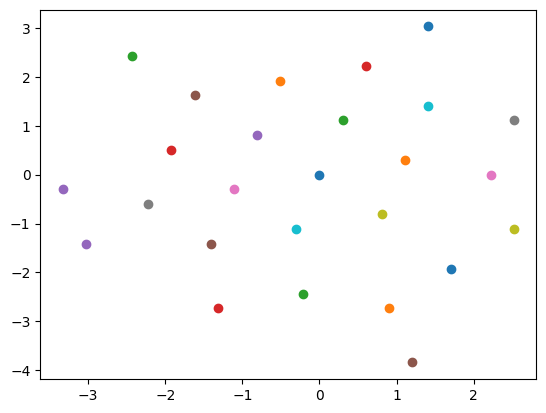

In [24]:
plt_poses(poses_over_steps[-1][-1])

In [ ]:
for i in range(len(area_over_poses)):
    print(i,' area: ',  area_over_poses[i][-1], ', steps: ', len(poses_over_steps[i]))

31
31
31
31
31
31


In [ ]:
max_length = len(max(area_over_poses, key=len))
print(max_length)
for i in range(len(area_over_poses)):
    area_over_poses[i].extend(np.repeat(area_over_poses[i][-1],max_length))

In [73]:
# Element-wise sum
ours_summed_areas = [sum(filter(None, values))/len(area_over_poses) for values in zip(*area_over_poses)]

print(ours_summed_areas)




[9.130591219781119, 15.336563761241045, 18.019078822859505, 20.643035285204373, 21.643035285204377, 23.821801822046414, 26.15513515537975, 26.98846848871308, 27.821801822046414, 28.48846848871308, 29.655126967354548, 30.094385566628134, 30.892843634021215, 31.05951030068788, 32.03522980447611, 32.70189647114278, 32.70189647114278, 32.868563137809446, 33.368563137809446, 33.70189647114278, 33.868563137809446, 34.03522980447611, 34.70189647114278, 34.868563137809446, 35.03522980447611, 35.03522980447611, 35.03522980447611, 35.368563137809446, 35.53522980447611, 35.868563137809446, 35.868563137809446]


In [114]:
#area_over_poses[1] = [min(x,big_ware_coverage+15) for x in area_over_poses[1]]

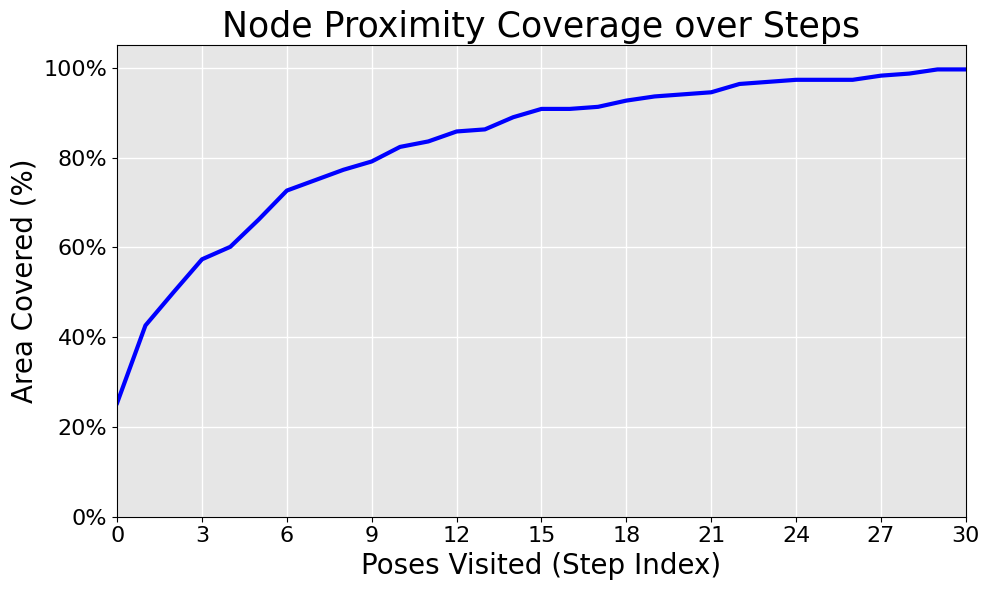

In [ ]:
# for i in range(len(area_over_poses)):
#     path = globals()['folder'+str(i)]
#     plot_coverage_over_steps(area_over_poses[i][:],mini_ware_coverage, save_path=path)
# plot_coverage_over_steps(area_over_poses[4][:],area_over_poses[4][-1], save_path=folder5)
plot_coverage_over_steps(ours_summed_areas[:],36, save_path=None)

## Extract data from csv file

/tmp/ipykernel_180393/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


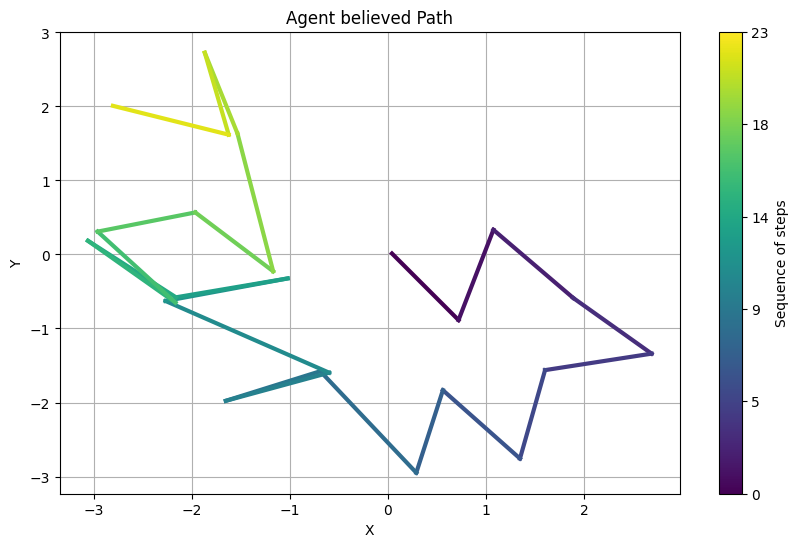

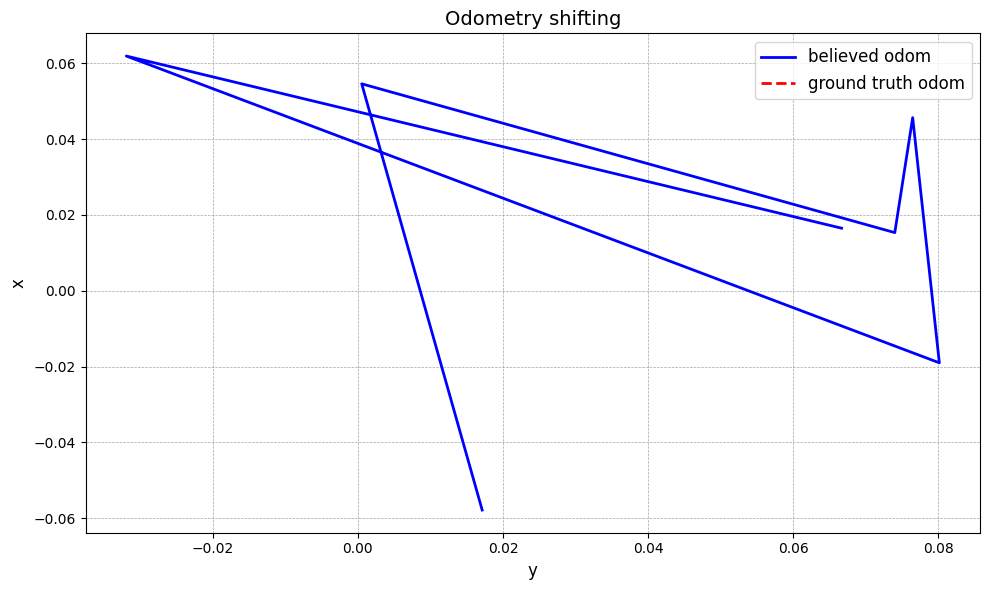

/tmp/ipykernel_180393/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


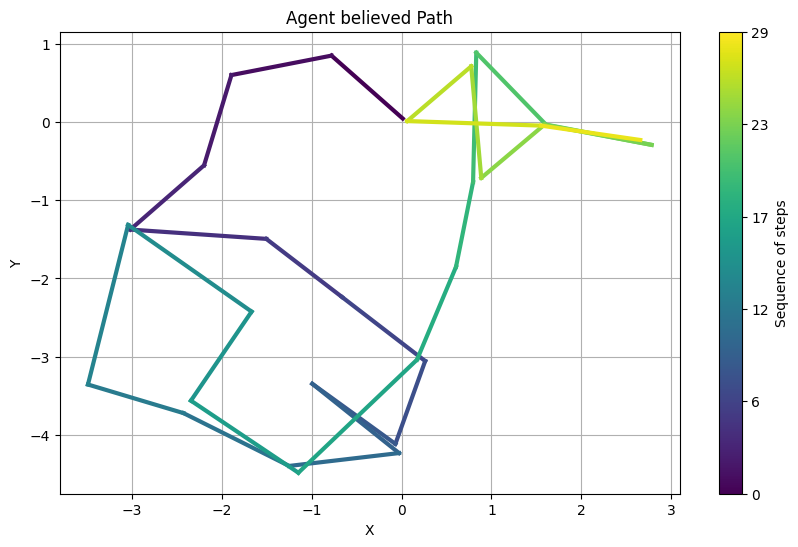

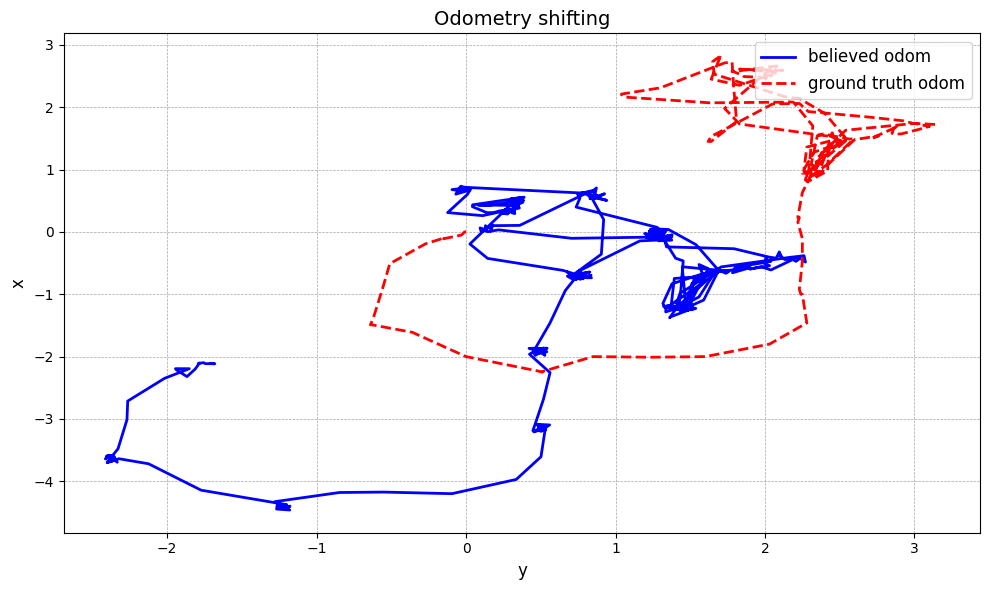

/tmp/ipykernel_180393/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


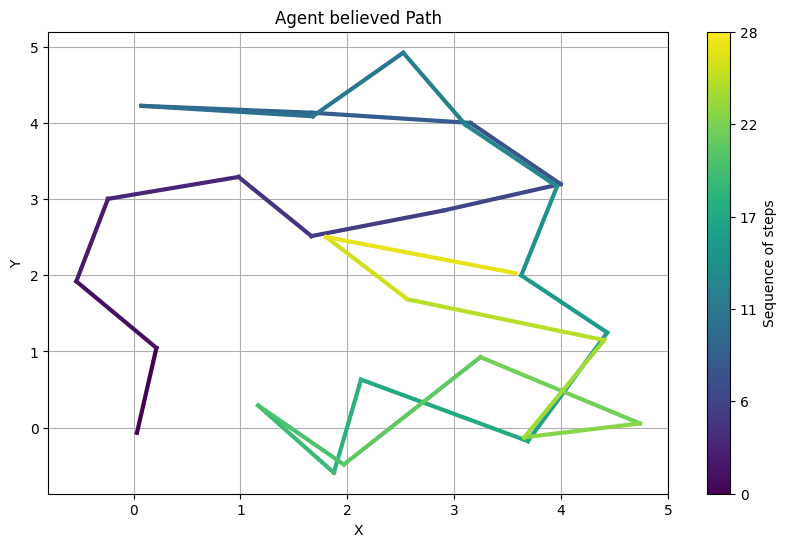

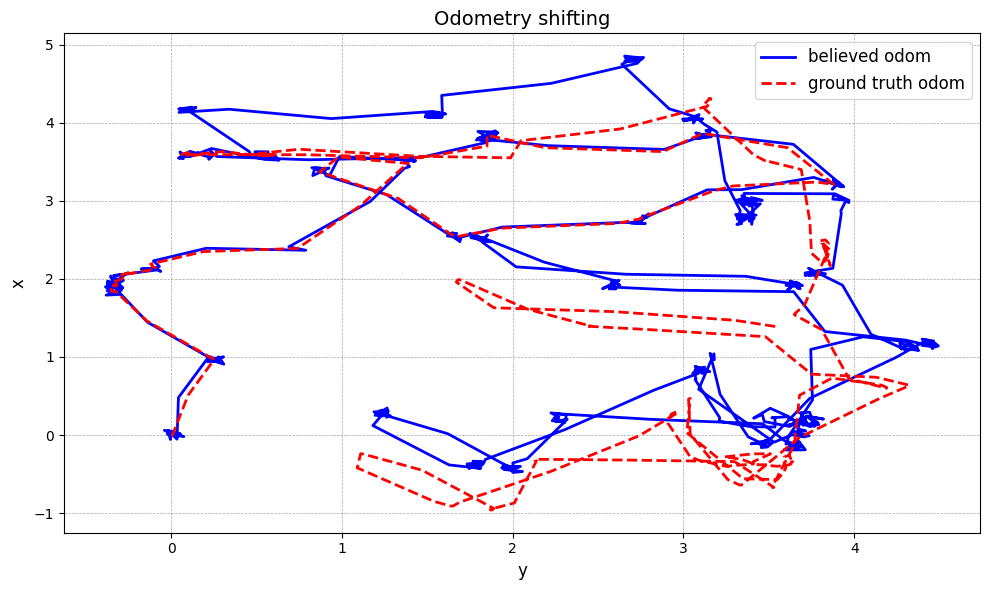

/tmp/ipykernel_180393/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


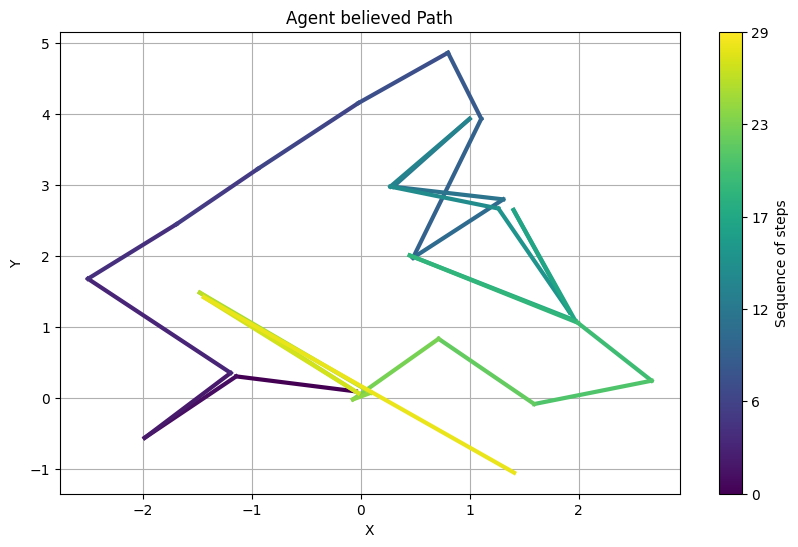

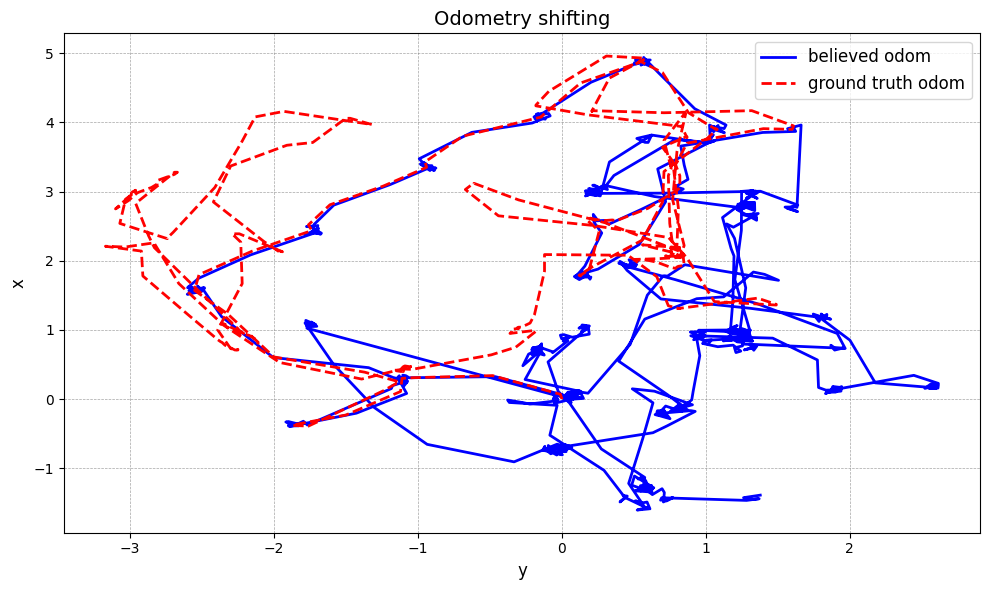

/tmp/ipykernel_180393/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


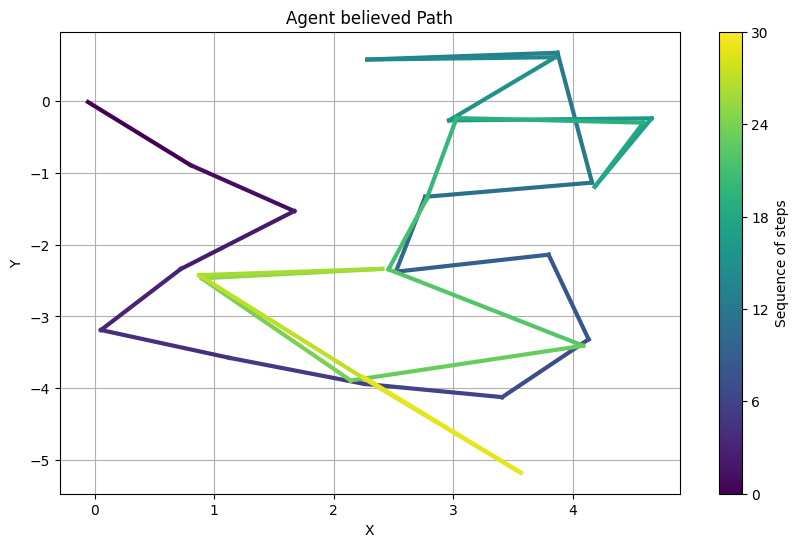

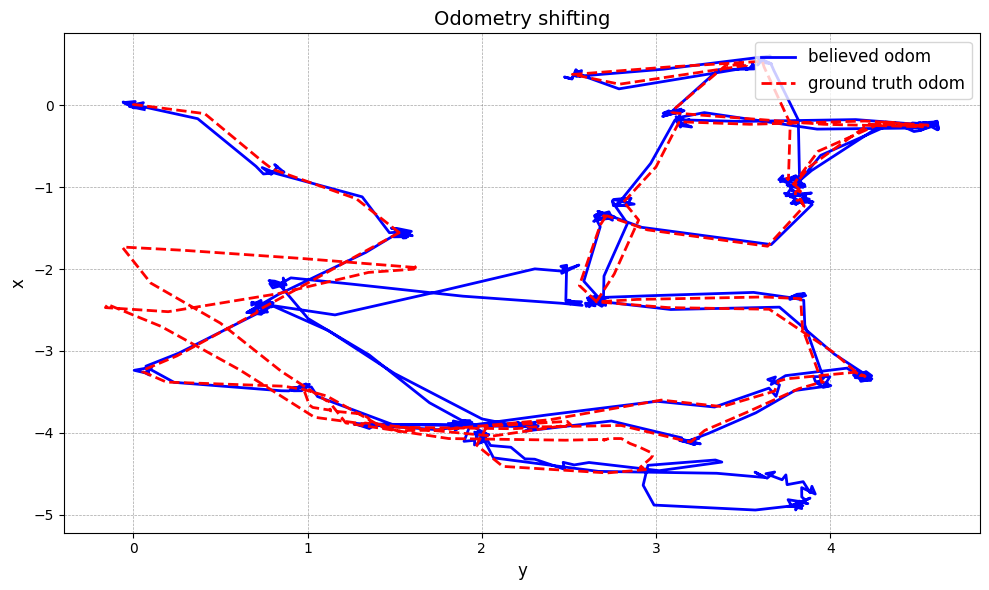

/tmp/ipykernel_180393/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


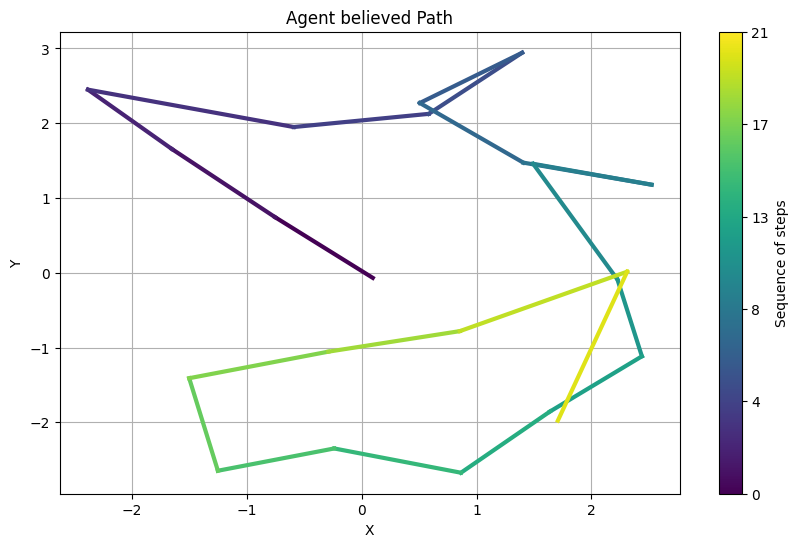

In [ ]:
for i in range(len(area_over_poses)):
    path = globals()['folder'+str(i)]
    step_per_step_csv_file = pd.read_csv(path+'/steps_data.csv', usecols=range(14))
    odom_data_steps = step_per_step_csv_file['odom']
    plot_odometry_path(odom_data_steps[:], noise_level=0.1, save_path=path)
    try:
        gt_csv_file = pd.read_csv(path+'/ours/records.csv', usecols=range(3))
        odom_data = gt_csv_file['odom'][:]
        real_odom_data = gt_csv_file['real_odom'][:]
        plot_paths_over_time(odom_data[:], real_odom_data[:], save_path=path)
    except:
        pass

In [60]:
step_per_step_csv_file = pd.read_csv(folder+'/steps_data.csv', usecols=range(14))
gt_csv_file = pd.read_csv(folder+'/ours/records.csv', usecols=range(3))
odom_data = gt_csv_file['odom'][:]
real_odom_data = gt_csv_file['real_odom'][:]

In case if our pose collector had a bug

In [ ]:
# gt_csv_file = pd.read_csv(folder1+'/0ours/records.csv', usecols=range(3))
# gt_csv_file2 = pd.read_csv(folder2+'/1ours/records.csv', usecols=range(3))
# odom_data = np.concatenate((gt_csv_file['odom'][:].dropna().values, gt_csv_file2['odom'][:].dropna().values))

# real_odom_data = np.concatenate((gt_csv_file['real_odom'][:].dropna().values,gt_csv_file2['real_odom'][:].dropna().values))

NameError: name 'folder1' is not defined

/tmp/ipykernel_8291/286780836.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Sequence of steps')


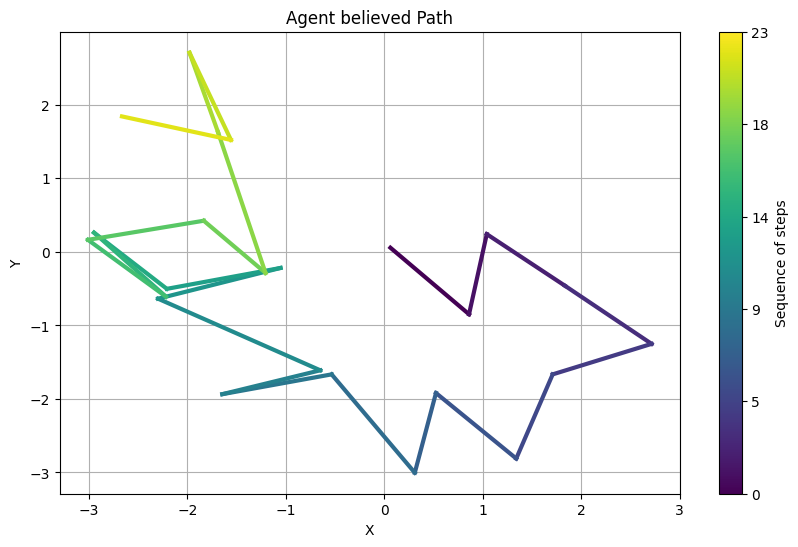

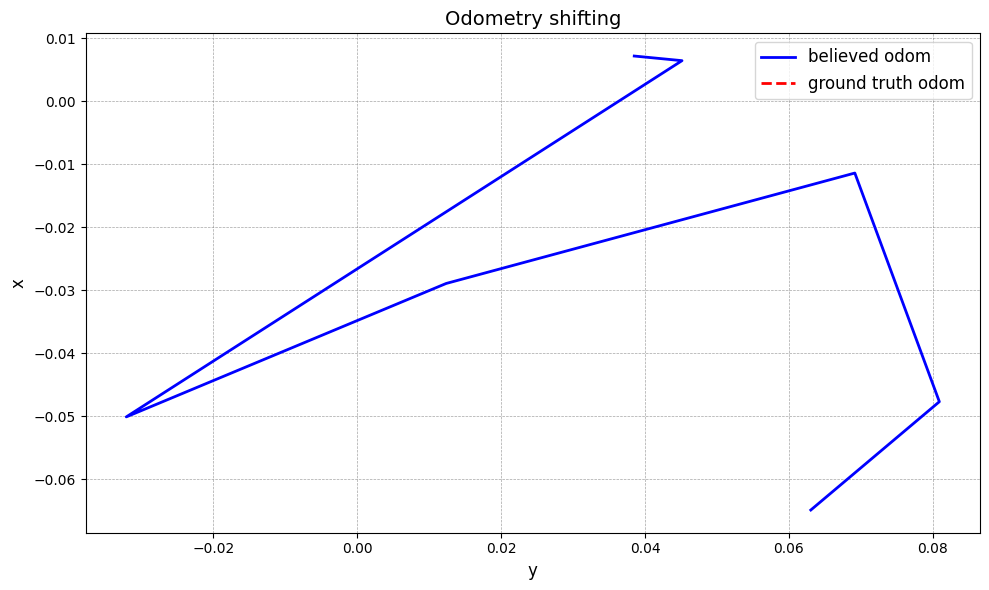

In [ ]:
#odom_data = gt_csv_file['odom'][:].dropna().values
# real_odom_data = gt_csv_file['real_odom'][:].dropna().values
# plot_odometry_path(odom_data_steps[:], noise_level=0.1, save_path=folder)

# plot_paths_over_time(odom_data[:], real_odom_data[:], save_path=folder)

## Show path to goal

In [87]:
step_per_step_csv_file = pd.read_csv(folder+'/goal_7/steps_data.csv', usecols=range(14))
gt_odom_csv = pd.read_csv(folder+'/goal_7/ours/records_noFalse.csv', usecols=range(3))
reduced_csv_file = step_per_step_csv_file[step_per_step_csv_file['action_success'] == True][['odom', 'goal_reached', 'applied_action']]

odom_data = reduced_csv_file['odom']
goal_reached = reduced_csv_file['goal_reached']
goal_pose = []

odom_data_gt = gt_odom_csv['odom']
# # action = reduced_csv_file['applied_action']
for i in range(len(odom_data)+1):
    try:
        if goal_reached[i] == True:
            goal_pose.append(eval(odom_data[i])[:2])
    except KeyError:
        continue

print(goal_pose)

[[-2.0, 0.0], [-2.0, 2.0], [-4.0, 2.0], [-4.0, 2.0], [0.0, 4.0], [-4.0, 2.0], [-4.0, 2.0]]


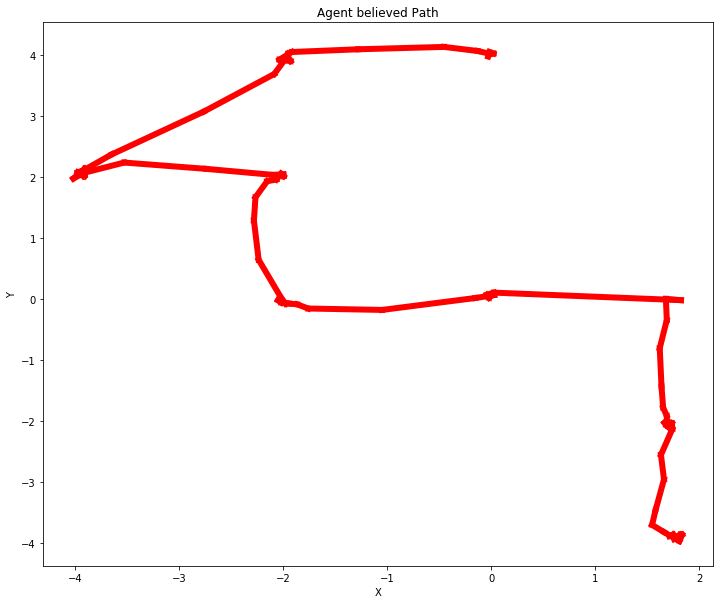

In [89]:
plot_path_goal(odom_data_gt[:-25])

# Frontiers SLAM plotting

In [245]:
big_ware_cell_coverage = 97400 #rounded as it's not perfect
home_cell_coverage = 65000
small_ware_cell_coverage = 32300
mini_ware_cell_coverage = 11400

In [237]:
def get_odom_visited_cells_per_steps(gt_csv_file):
    # Initialize the first odom position and a list to store results
    odom_prev = np.array(gt_csv_file['odom'][0])

    visited_cells = [float(gt_csv_file['visited cells'][0])]
    odom_data = [odom_prev]

    # Iterate through the rows
    for index, row in gt_csv_file.iterrows():
        current_odom = np.array(row['odom'])
        distance = (current_odom[0]- odom_prev[0])**2 + (current_odom[1]- odom_prev[1])**2   # Calculate Euclidean distance
        
        if distance >= 1:  # Check if at least 2m away
            odom_data.append(current_odom)
            visited_cells.append(float(row['visited cells']))
            odom_prev = current_odom  # Update the previous odom
    return odom_data, visited_cells

In [228]:
folder = '/home/idlab332/workspace/ros_ws/frontiers/'
#test = 'frontiers_waffle_big_ware_4_YES'
test = 'frontiers_waffle_mini_ware_1'
test2 = 'frontiers_waffle_mini_ware_2'

In [238]:
odom_data_tests= []
visited_cells_tests = []
for id,t in enumerate([test, test2]):
    odom_data_tests.append([])
    visited_cells_tests.append([])
    print(id,t)
    gt_csv_file = pd.read_csv(folder+ t +'/records.csv', usecols=range(6))
    # print(gt_csv_file['odom'])
    gt_csv_file['odom'] = gt_csv_file['odom'].apply(lambda x: eval(x))
    odom_data_tests[id], visited_cells_tests[id] = get_odom_visited_cells_per_steps(gt_csv_file)

0 frontiers_waffle_mini_ware_1
1 frontiers_waffle_mini_ware_2


In [231]:
visited_cells_tests[0][-1]

11270.0

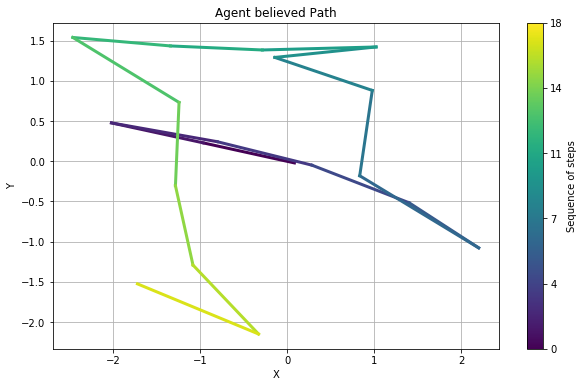

In [244]:
plot_odometry_path(odom_data_tests[1],save_path=folder+ test2)

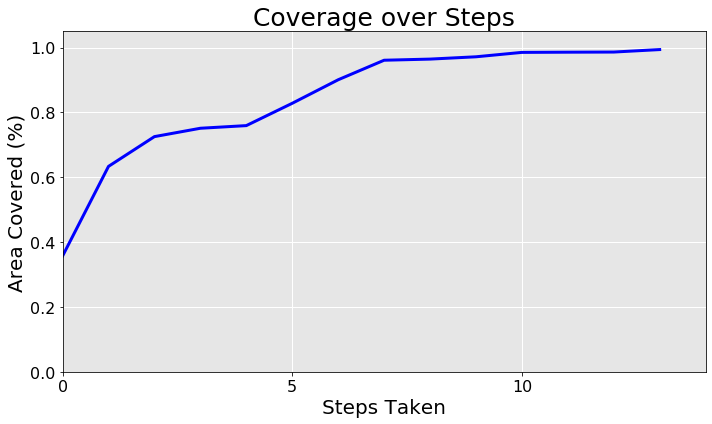

In [242]:
normalised_area = np.array(visited_cells_tests[0]) / mini_ware_cell_coverage
plot_coverage_over_steps(normalised_area, save_path=folder+ test)

### plot all envs averaged coverage over steps

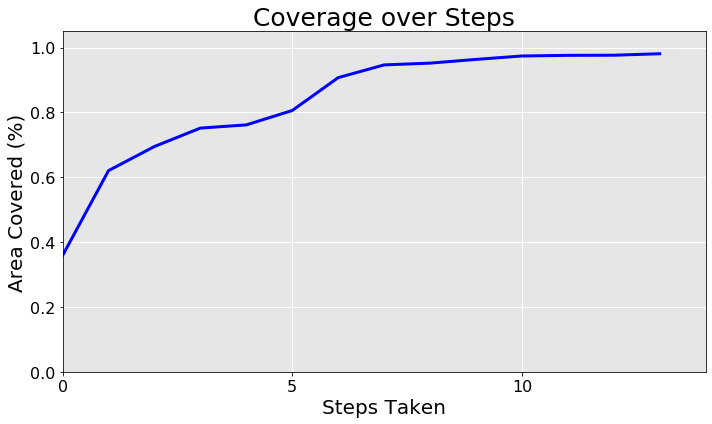

In [251]:
summed_areas = [sum(filter(None, values))/len(visited_cells_tests) for values in zip(*visited_cells_tests)]
frontiers_normalised_summed_area = np.array(summed_areas) /mini_ware_cell_coverage
# print(summed_areas)
plot_coverage_over_steps(frontiers_normalised_summed_area)

## Frontiers VS ours

In [261]:
ours_normalised_summed_areas = np.array(ours_summed_areas)/ mini_ware_coverage

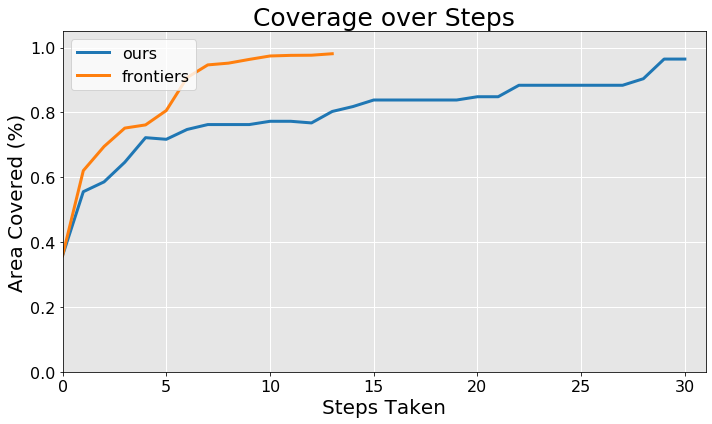

In [265]:
plot_multiple_coverage_over_steps([ours_normalised_summed_areas[:-3],frontiers_normalised_summed_area[:]], labels=['ours', 'frontiers'])